In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
BASIC DISCRIPTIVE STATISTICS:

In [4]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Absentisam.csv')

In [5]:
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [6]:
df.columns


Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
df['Absenteeism time in hours'].describe()

count    740.000000
mean       6.924324
std       13.330998
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: Absenteeism time in hours, dtype: float64

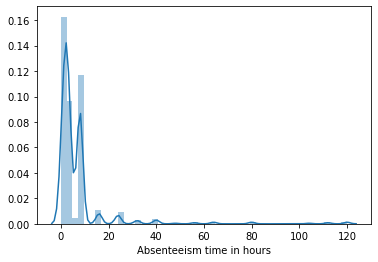

In [8]:
sns.distplot(df['Absenteeism time in hours']);

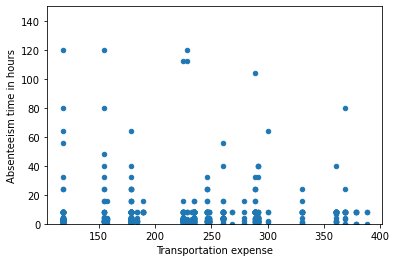

In [9]:
var='Transportation expense'
data = pd.concat([df['Absenteeism time in hours'], df[var]], axis=1)
data.plot.scatter(x=var, y='Absenteeism time in hours', ylim=(0,150));

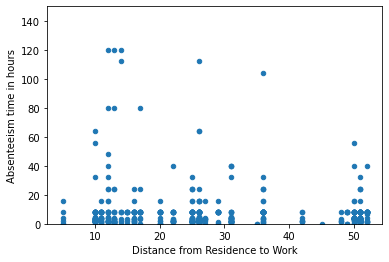

In [10]:
var='Distance from Residence to Work'
data = pd.concat([df['Absenteeism time in hours'], df[var]], axis=1)
data.plot.scatter(x=var, y='Absenteeism time in hours', ylim=(0,150));

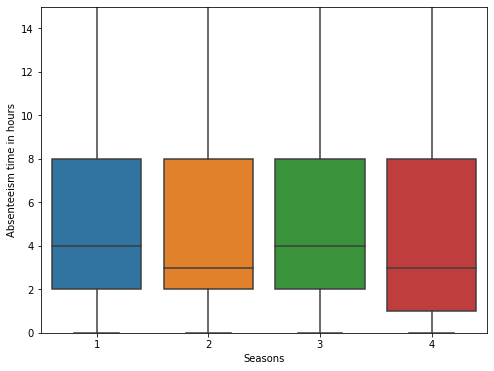

In [11]:
var='Seasons'
data = pd.concat([df['Absenteeism time in hours'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="Absenteeism time in hours", data=data)
fig.axis(ymin=0, ymax=15);

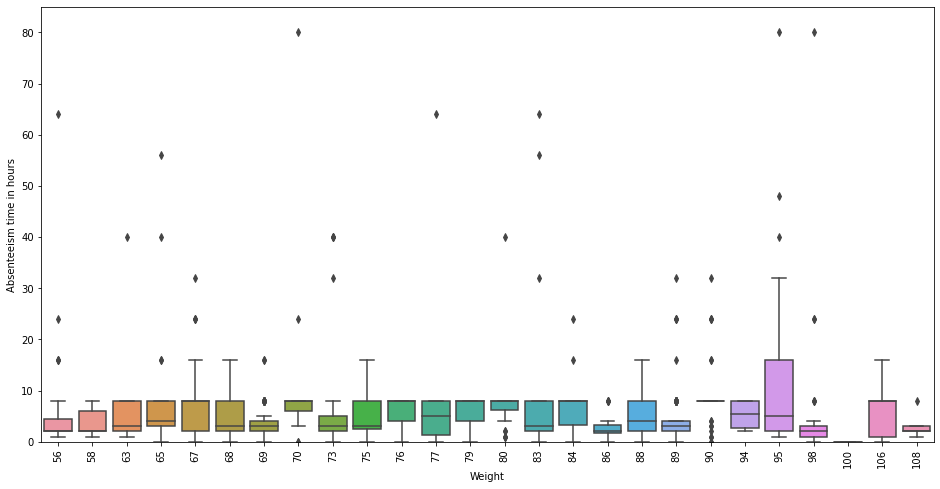

In [13]:
var = 'Weight'
data = pd.concat([df['Absenteeism time in hours'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Absenteeism time in hours", data=data)
fig.axis(ymin=0, ymax=85);
plt.xticks(rotation=90);

                                       ID  Reason for absence  \
ID                               1.000000           -0.064245   
Reason for absence              -0.064245            1.000000   
Month of absence                -0.000043           -0.083858   
Day of the week                  0.034468            0.116319   
Seasons                          0.098495           -0.117925   
Transportation expense          -0.224163           -0.119381   
Distance from Residence to Work -0.486160            0.161831   
Service time                    -0.272704            0.048425   
Age                              0.040899           -0.078608   
Work load Average/day            0.092457           -0.123472   
Hit target                       0.018789            0.088943   
Disciplinary failure             0.004502           -0.545054   
Education                       -0.036254           -0.047357   
Son                              0.002767           -0.055364   
Social drinker           

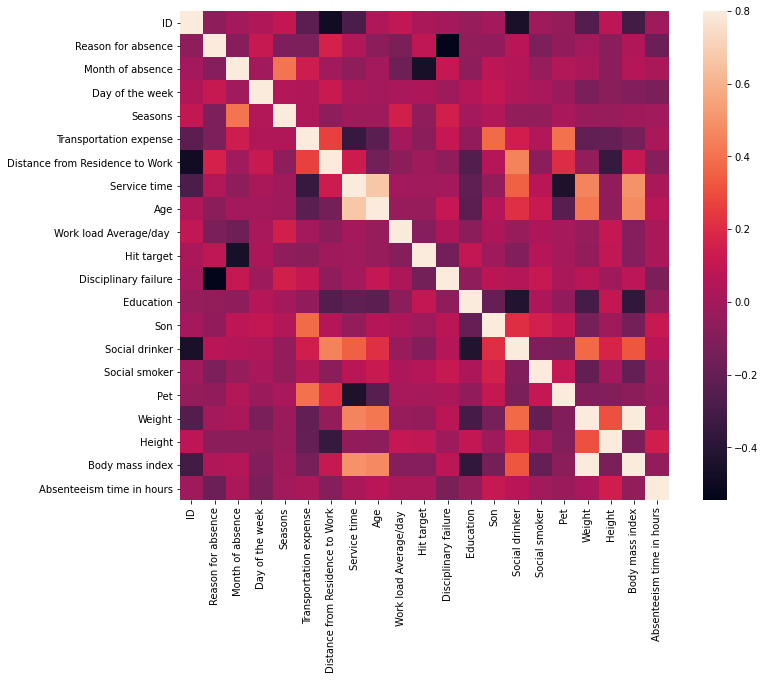

In [15]:
corrmat = df.corr()
print (corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

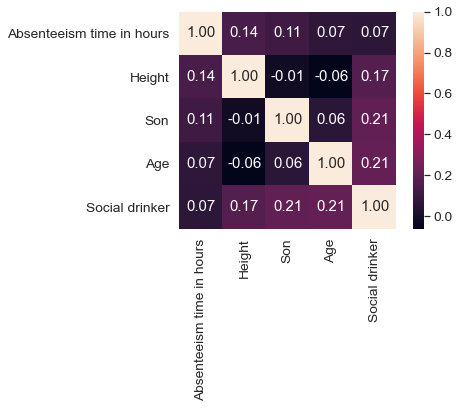

In [17]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Absenteeism time in hours')['Absenteeism time in hours'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

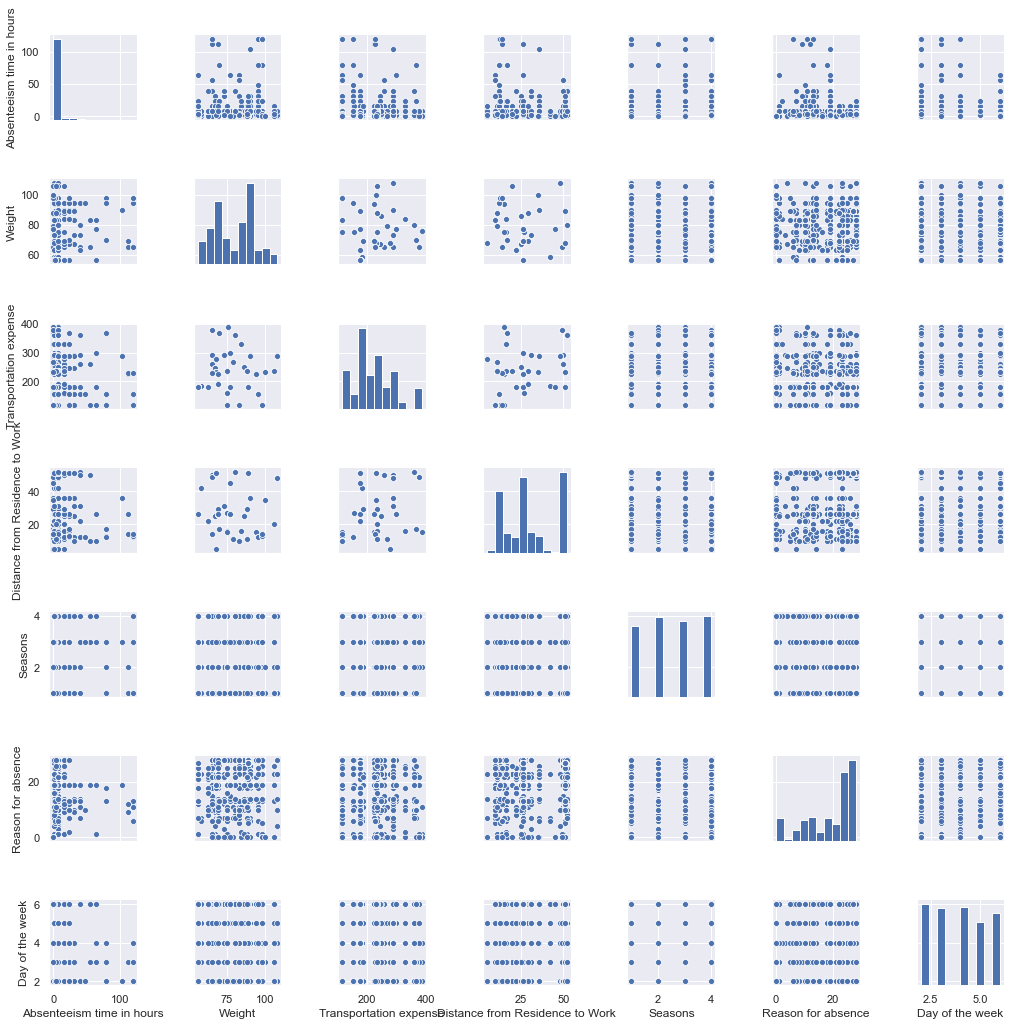

In [18]:
sns.set()
cols = ['Absenteeism time in hours', 'Weight', 'Transportation expense', 'Distance from Residence to Work', 'Seasons', 'Reason for absence', 'Day of the week']
sns.pairplot(df[cols], size = 2.0)
plt.show();

In [19]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
Absenteeism time in hours            0      0.0
Work load Average/day                0      0.0
Reason for absence                   0      0.0
Month of absence                     0      0.0
Day of the week                      0      0.0
Seasons                              0      0.0
Transportation expense               0      0.0
Distance from Residence to Work      0      0.0
Service time                         0      0.0
Age                                  0      0.0
Hit target                           0      0.0
Body mass index                      0      0.0
Disciplinary failure                 0      0.0
Education                            0      0.0
Son                                  0      0.0
Social drinker                       0      0.0
Social smoker                        0      0.0
Pet                                  0      0.0
Weight                               0      0.0
Height                               0      0.0

In [ ]:
IMPORT LIBRARIES

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
df = pd.read_csv(r'C:\Users\Admin\Desktop\Absentisam.csv')
df.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [ ]:
CHECKING FOR MISSING VALUES IF ANY CAN BE REPLACED BY STASTICAL VALUE MEAN OR MEDIAN.

In [12]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [13]:
df.describe()

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Average/day   ...  \
count    740.000000  740.000000              740.000000  ...   
mean      12.554054   36.450000              271.490235  ...   
std        4.384873    6.478772               39.058116  ...   
min        1.000000   27.000000              205.917000  ...   
25%        9.000000   31.000000              244.387000  ...   
50%       13.000000   37.000000              264.249000  ...   
75%       16.000000   40.000000              294.217000  ...   
max       29.000000   58.000000              378.884000  ...   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

In [ ]:
EDA

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
cols = df.columns.tolist()
cols.pop(0)

'ID'

Text(0.5, 1.0, 'Average')

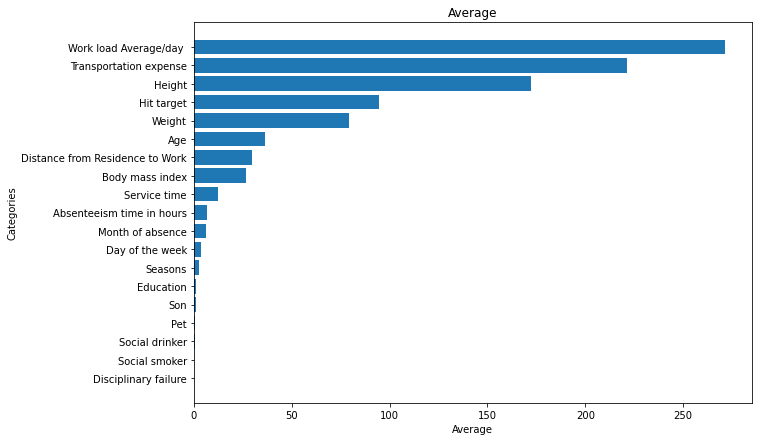

In [17]:
AvgR = df[cols[1:]].mean()
AvgR = AvgR.sort_values()
plt.figure(figsize=(10,7))
plt.barh(np.arange(len(cols[1:])), AvgR.values, align='center')
plt.yticks(np.arange(len(cols[1:])), AvgR.index)
plt.ylabel('Categories')
plt.xlabel('Average')
plt.title('Average')

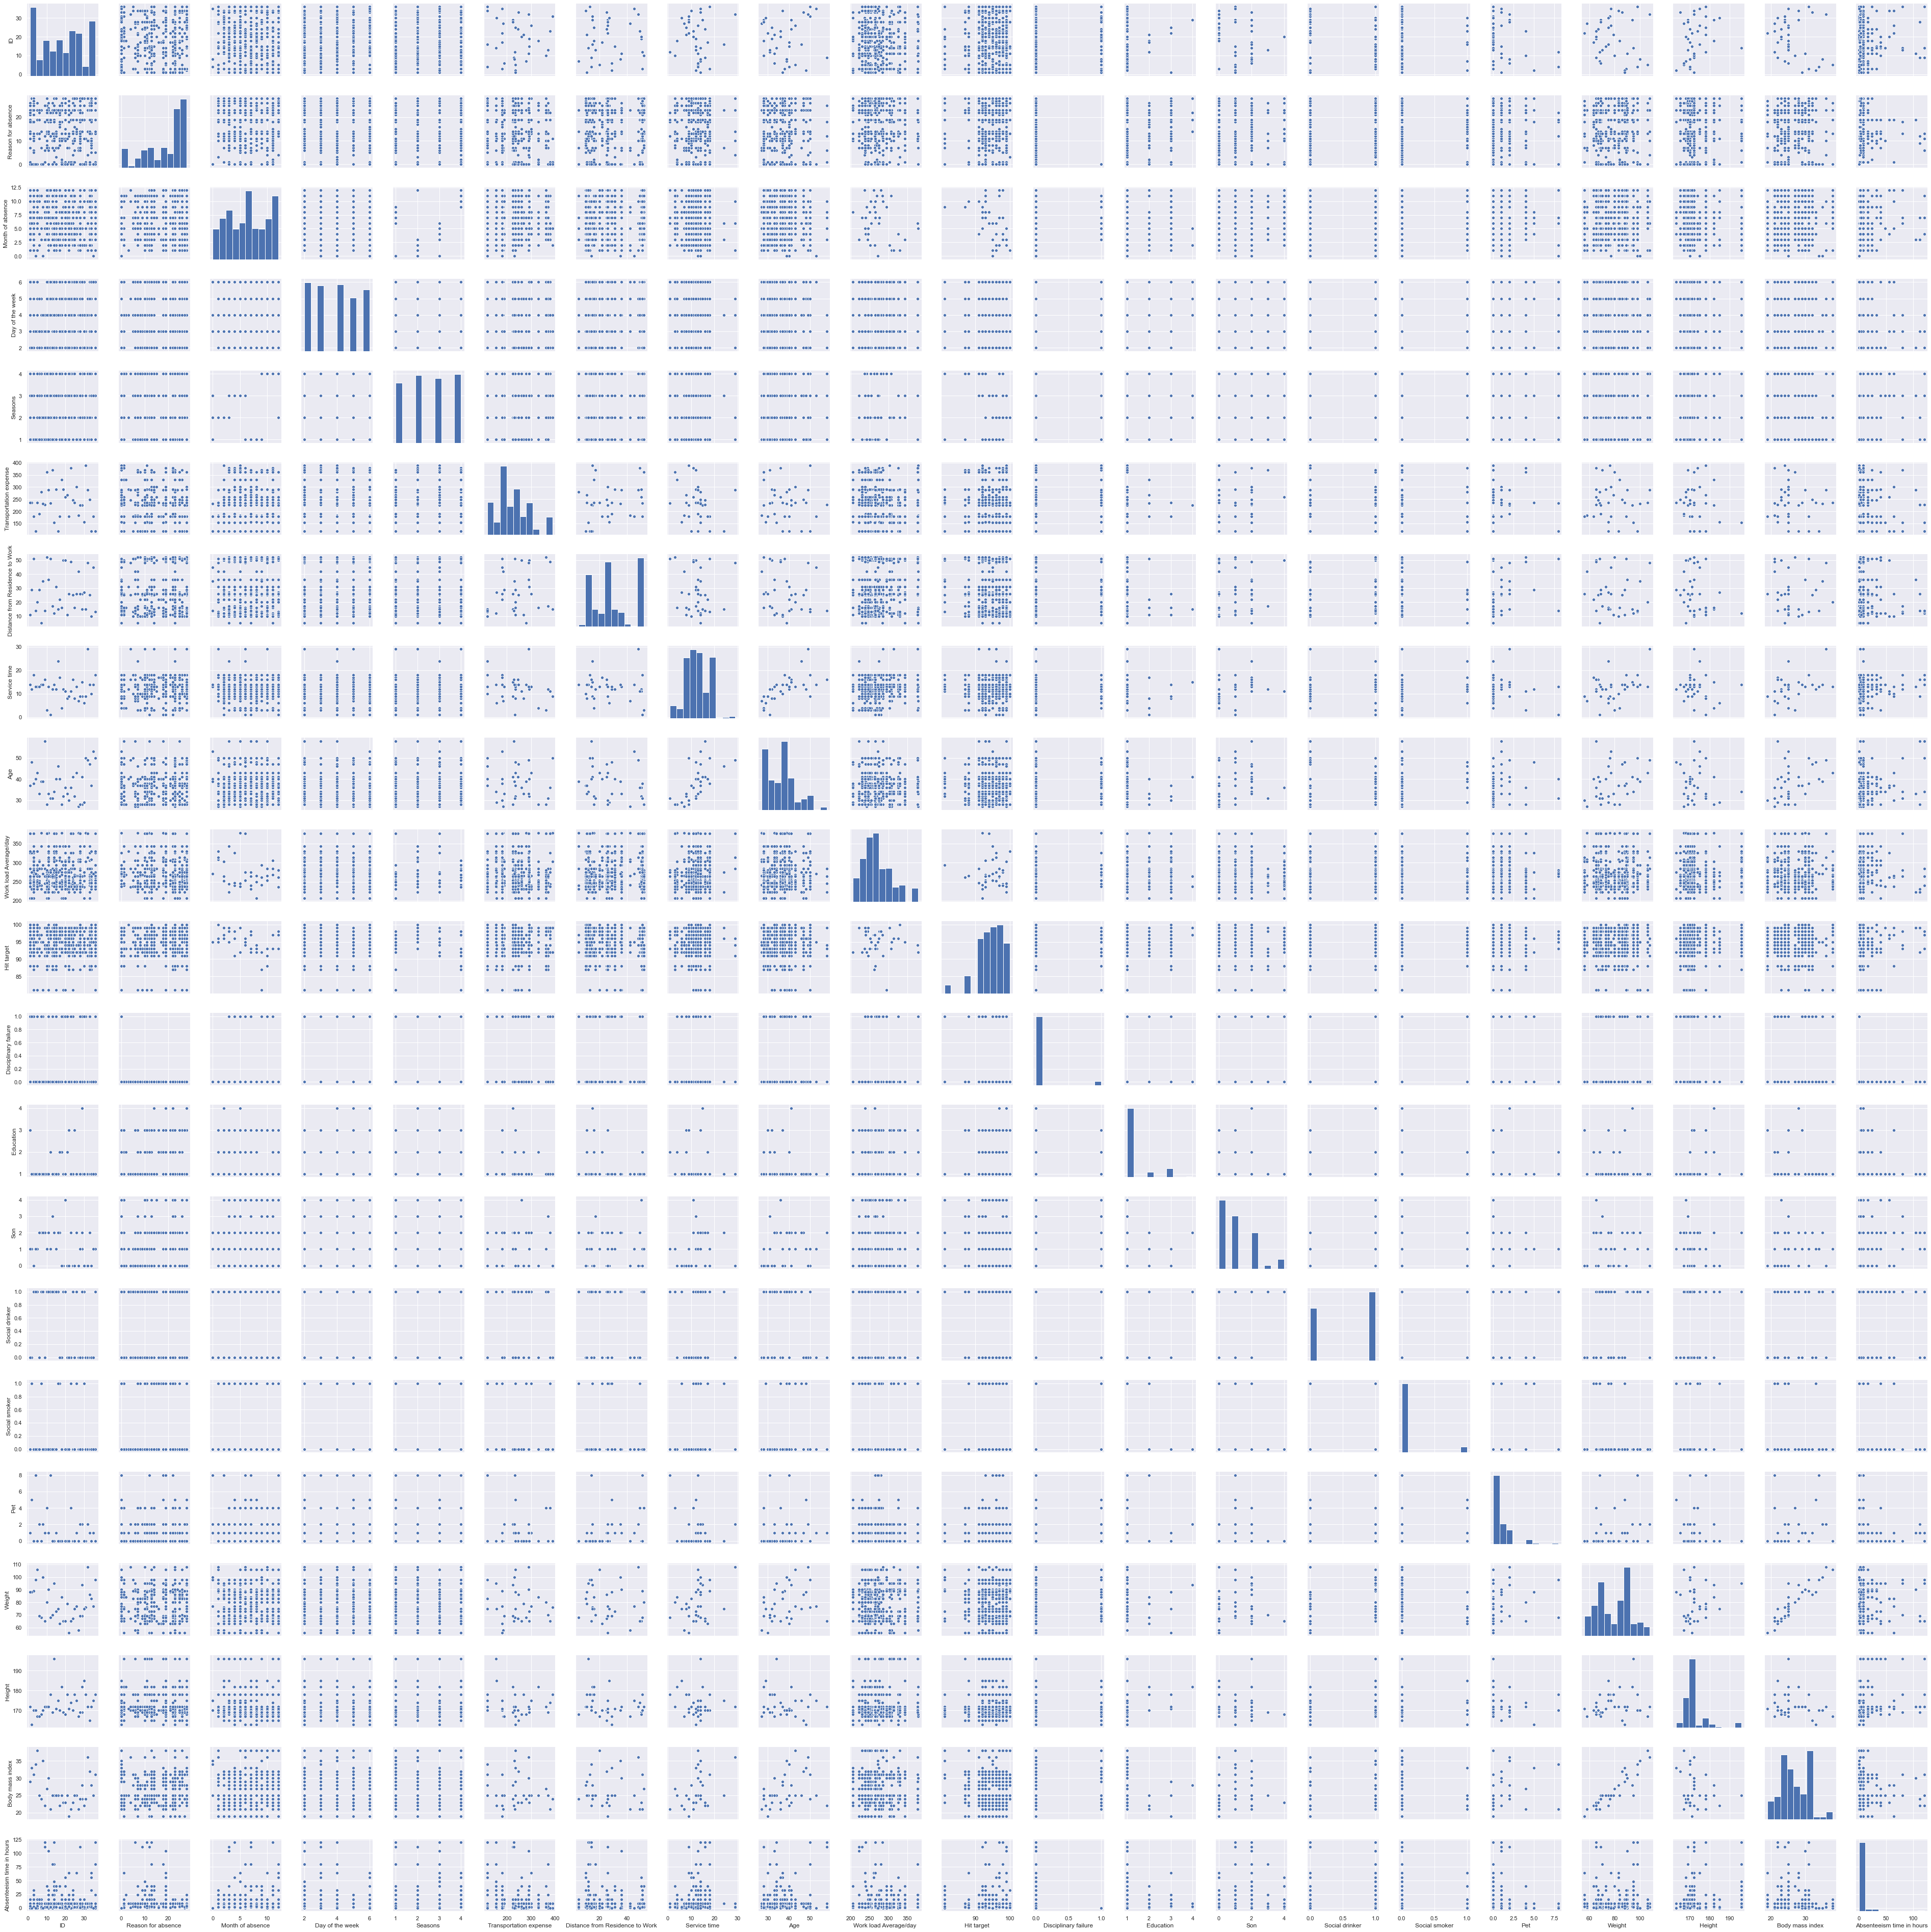

In [27]:
sns.pairplot(df)

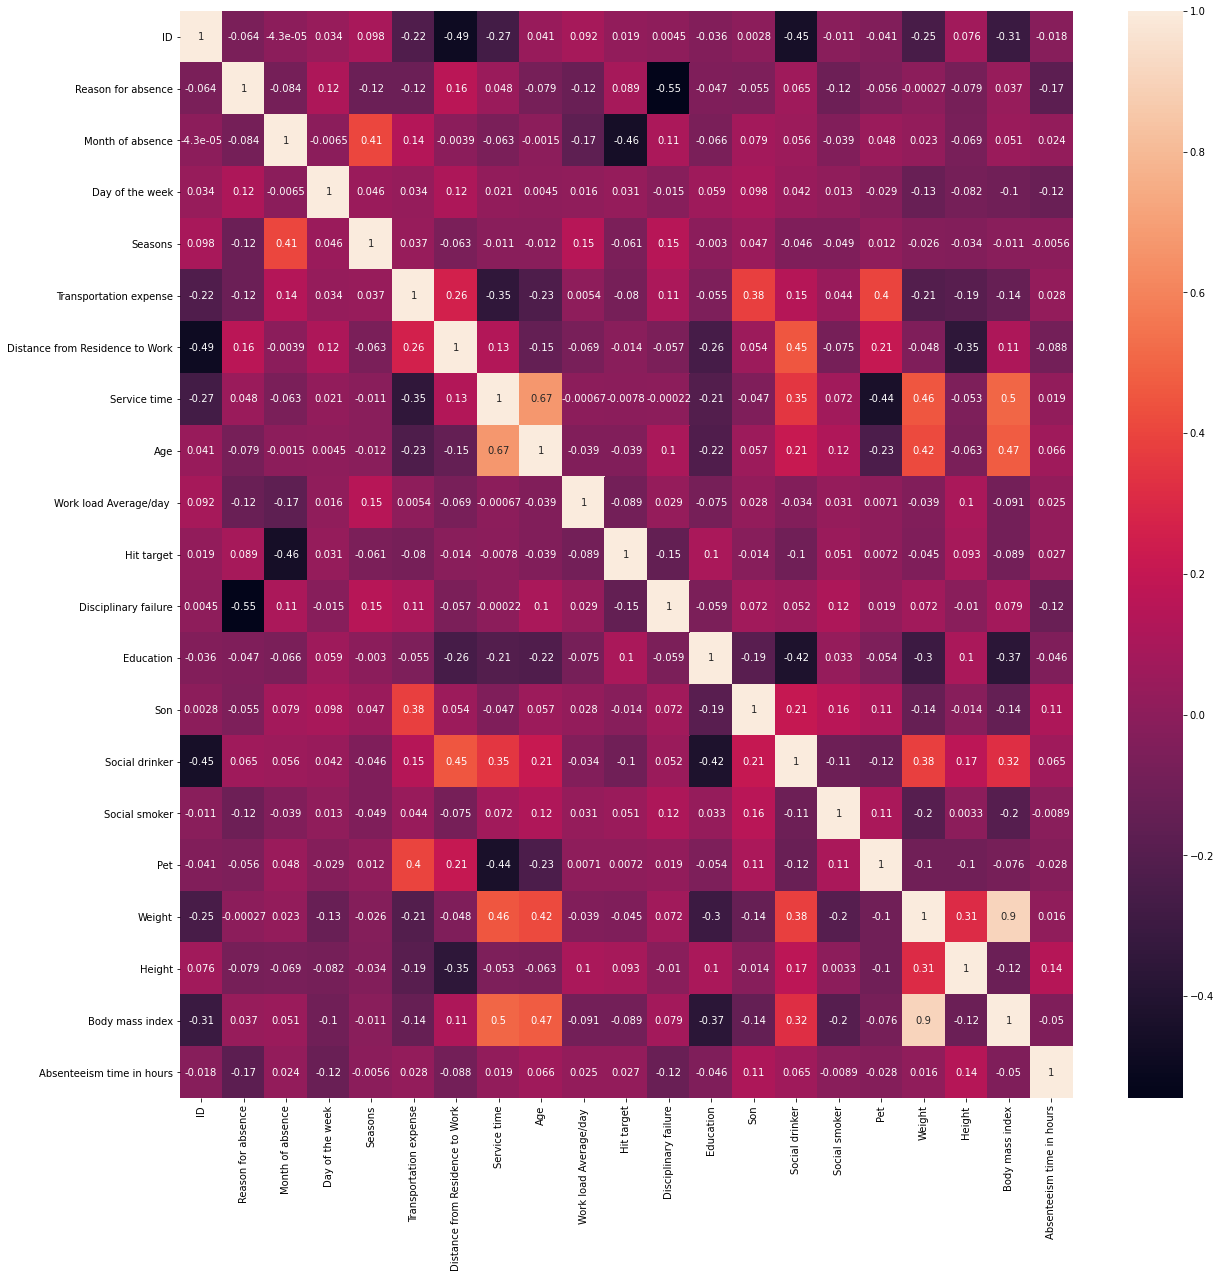

In [19]:
fig, ax = plt.subplots(figsize=(20, 20)) 
sns.heatmap(df.corr(), annot = True, ax = ax)

In [18]:
DF = df.copy()
DF.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [ ]:
USING ELBOW METHOD FOR K MEAN CLUSTERING WITHIN (WITHIN CLUSTERS SUM OF SQUARE):

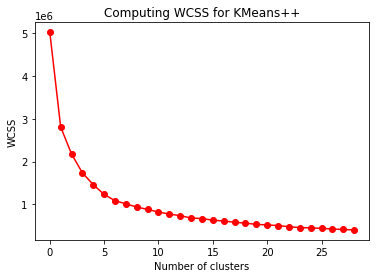

In [19]:
vals = DF.iloc[ :, 1:].values

from sklearn.cluster import KMeans
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( vals )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
Graph Description: Observing the above graph we decided the value of k as 5(ELBOW JOINT)

In [49]:
X = df.drop(['ID'],axis=1).values
Y = df['ID'].values

In [50]:
km = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=500) 
y_pred = kmeans.fit_predict(X)

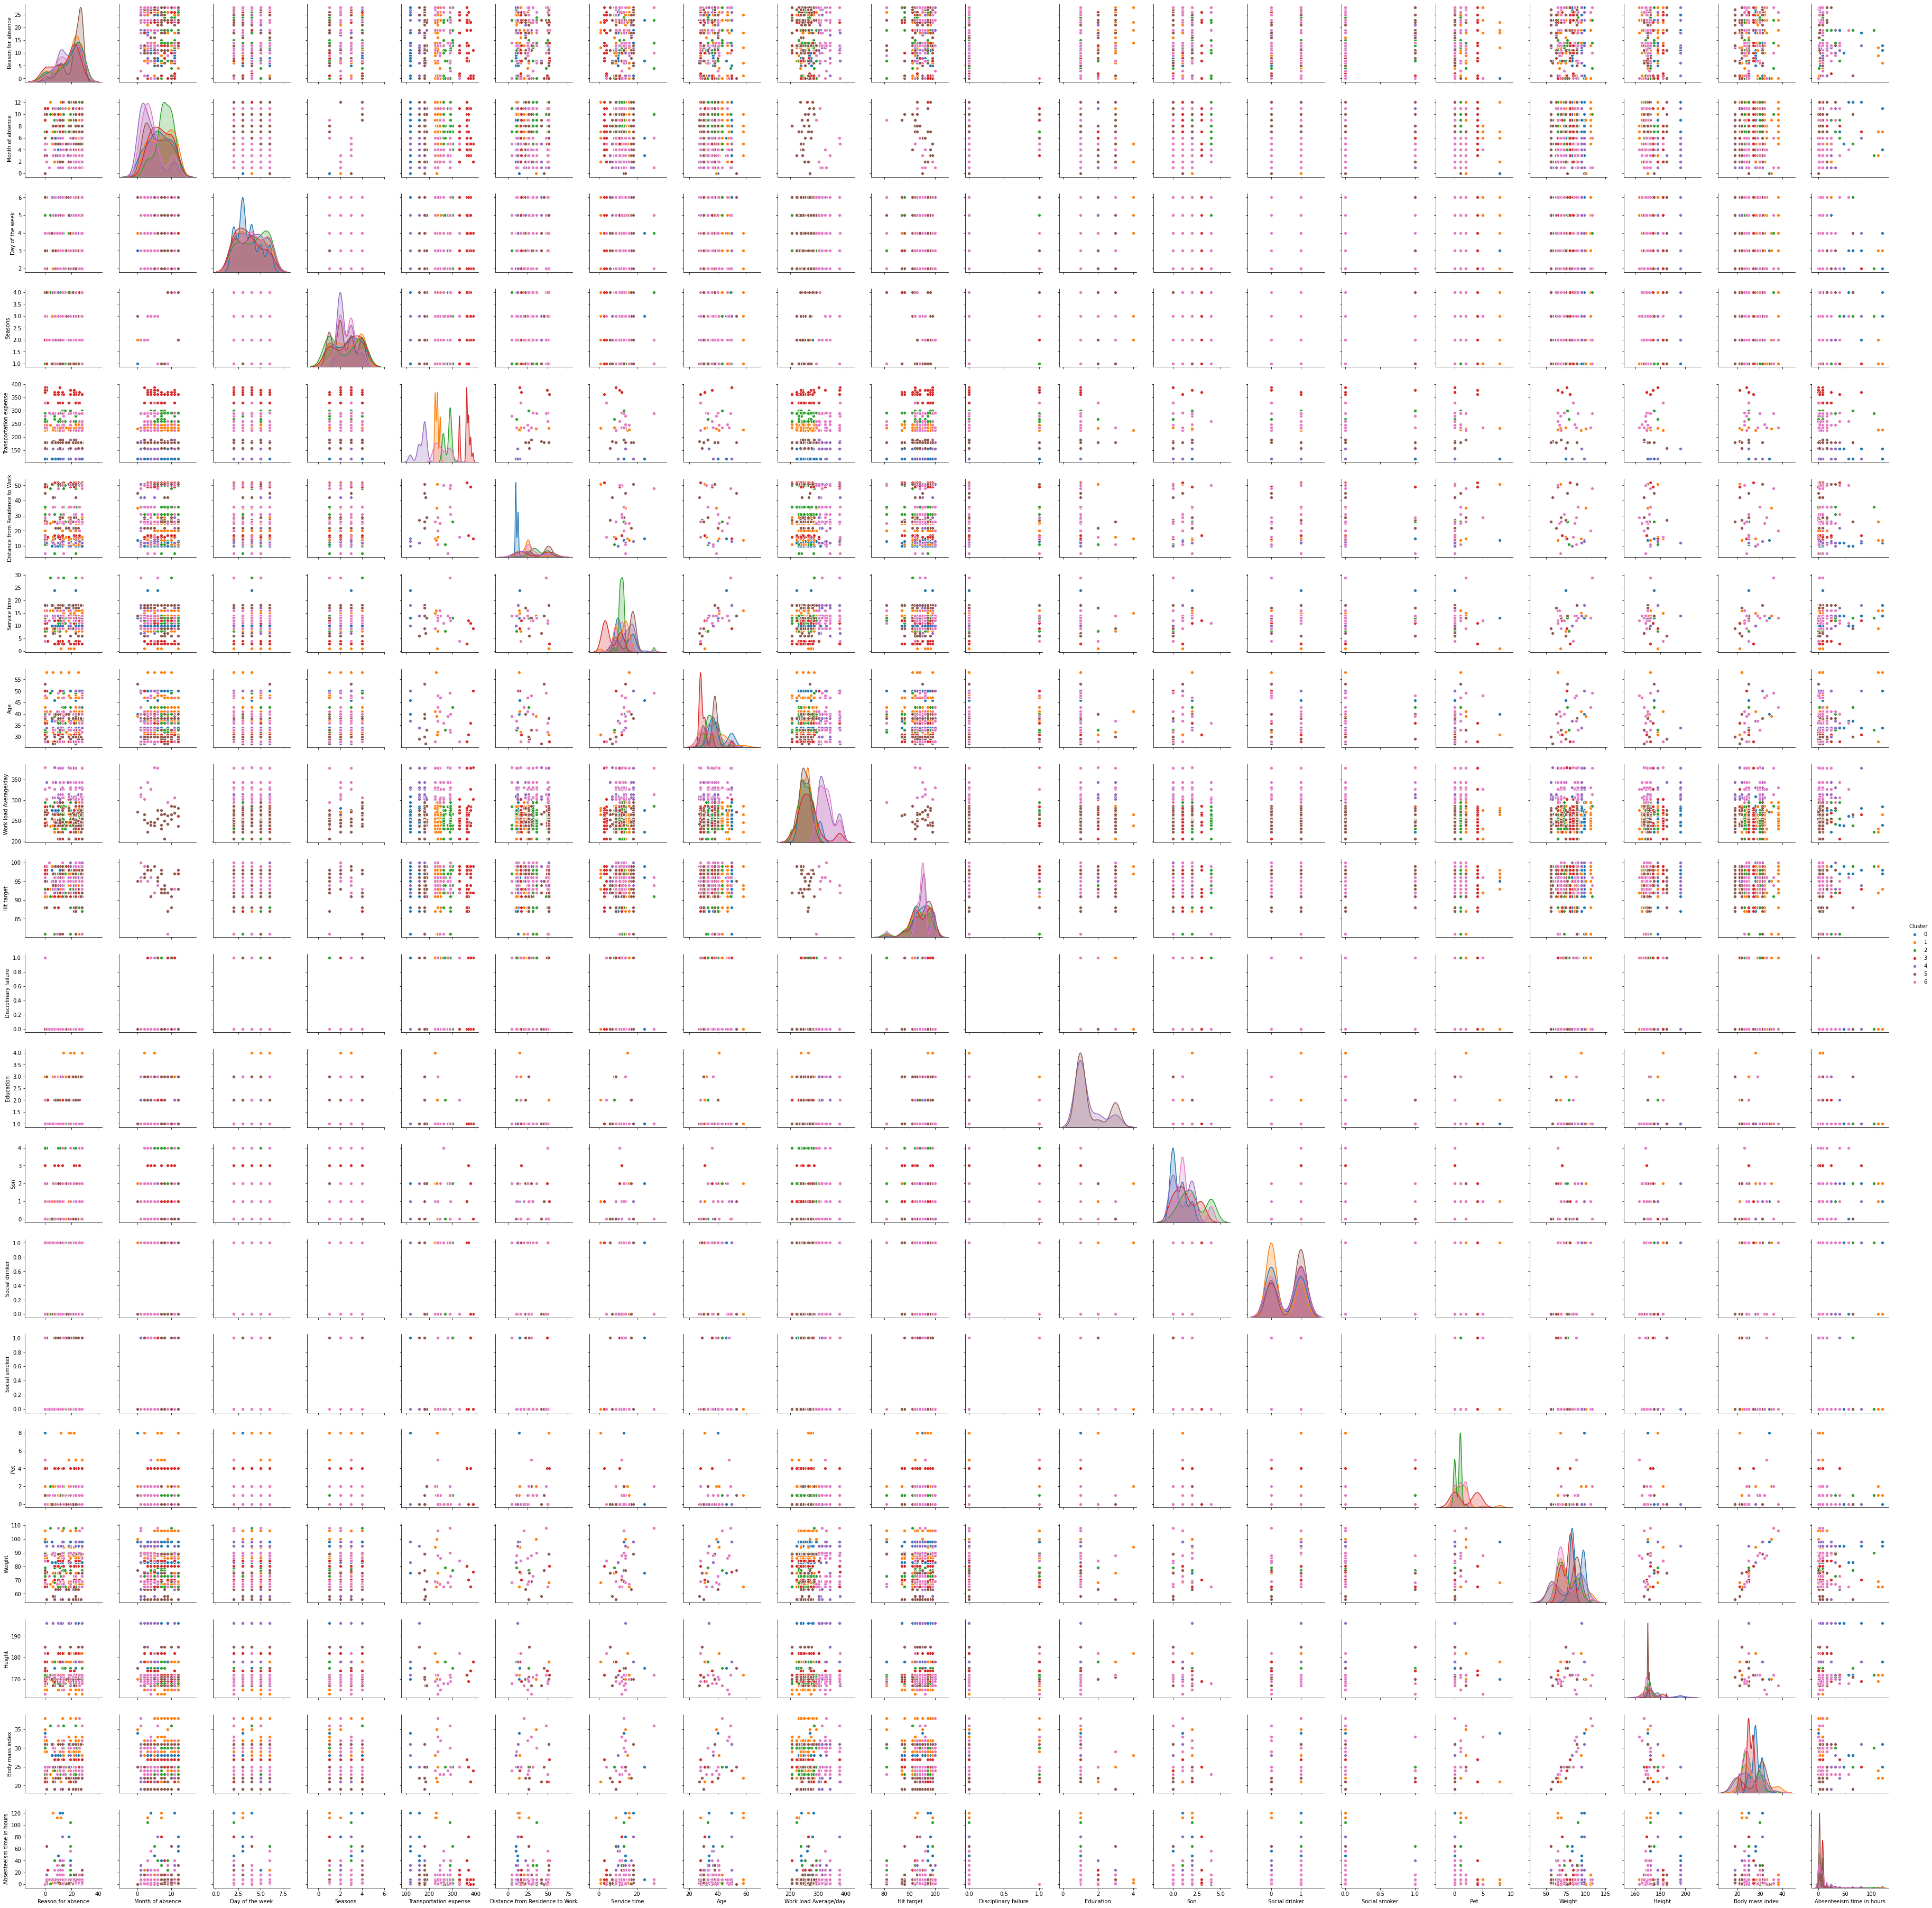

In [51]:
DF["Cluster"] = y_pred
cols = list(DF.columns)
cols.remove("ID")

sns.pairplot( DF[cols], hue="Cluster")

In [ ]:
Hierachical Clustering

In [84]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
special function designed  for drawing a line on the generated dendrogram, in order to bring out number of clusters

In [85]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
picked Ward Linkage for the Dendrogram as minimum variance criterion minimizes the total within-cluster variance


Text(0.5, 1.0, 'Hierarchical Clustering')

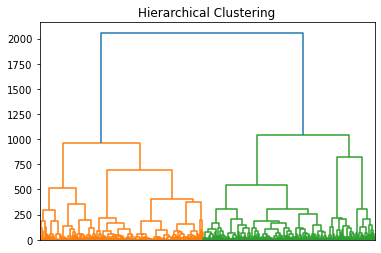

In [54]:
Z = sch.linkage(df,method='ward')  
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')

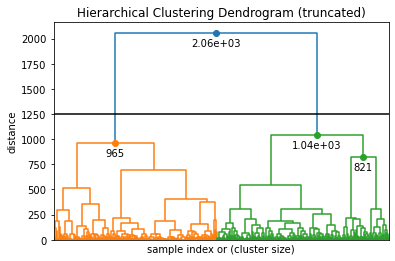

In [55]:
Z = linkage(df,method='ward')
fd(Z,leaf_rotation=90.,show_contracted=True,annotate_above=750,max_d=1250)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 

In [ ]:
Graph Description: Now if we draw a horizontal line from 1250, we come across the 2 clusters generated by Ward hierarhical clustering

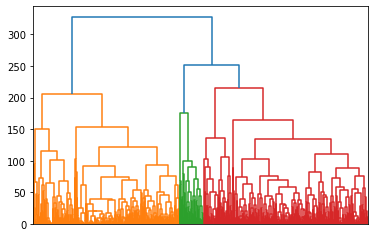

In [56]:
Z = sch.linkage(df,method='complete')  
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 

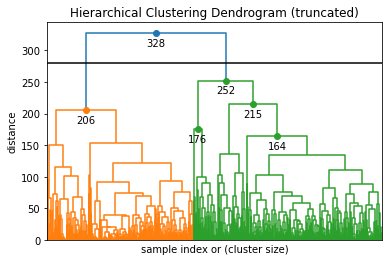

In [57]:
Z = linkage(df,method='complete')
fd(Z,leaf_rotation=90.,show_contracted=True,annotate_above=160,max_d=280)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline 
import numpy as np

In [26]:
DF=pd.read_csv(r'C:\Users\Admin\Desktop\Absentisam.csv')

In [27]:
DF.shape  

(740, 21)

In [28]:
DF.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [29]:
DF.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [67]:
features=['Month of absence','Day of the week','Seasons','Transportation expense','Distance from Residence to Work','Age','Body mass index','Weight','Absenteeism time in hours']
X=DF[features]

In [ ]:
Feature Scaling for Clustering

In [68]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_data=pd.DataFrame(stdsc.fit_transform(X),index=X.index,columns=X.columns).add_suffix('_std')

In [32]:
X_data.describe()

Month of absence_std  Day of the week_std   Seasons_std  \
count          7.400000e+02         7.400000e+02  7.400000e+02   
mean          -9.067822e-16         8.881784e-17  2.302963e-16   
std            1.000676e+00         1.000676e+00  1.000676e+00   
min           -1.841698e+00        -1.347819e+00 -1.390175e+00   
25%           -9.680719e-01        -6.439473e-01 -4.901490e-01   
50%           -9.444604e-02         5.992420e-02  4.098765e-01   
75%            7.791798e-01         7.637957e-01  1.309902e+00   
max            1.652806e+00         1.467667e+00  1.309902e+00   

       Transportation expense_std  Distance from Residence to Work_std  \
count                7.400000e+02                         7.400000e+02   
mean                 6.601326e-17                        -5.911187e-17   
std                  1.000676e+00                         1.000676e+00   
min                 -1.544379e+00                        -1.661258e+00   
25%                 -6.326655e-01                        -9.193567e-01   
50%                  5.485632e-02                        -2.449005e-01   
75%                  5.779707e-01                         1.373794e+00   
max                  2.491075e+00                         1.508686e+00   

            Age_std  Body mass index_std    Weight_std  \
count  7.400000e+02         7.400000e+02  7.400000e+02   
mean  -4.626929e-16        -1.215244e-16  2.794311e-17   
std    1.000676e+00         1.000676e+00  1.000676e+00   
min   -1.459596e+00        -1.792627e+00 -1.789206e+00   
25%   -8.417777e-01        -6.251003e-01 -7.794581e-01   
50%    8.495004e-02        -3.915949e-01  3.079626e-01   
75%    5.483139e-01         1.009438e+00  7.740000e-01   
max    3.328497e+00         2.643976e+00  2.249785e+00   

       Absenteeism time in hours_std  
count                   7.400000e+02  
mean                    9.751959e-17  
std                     1.000676e+00  
min                    -5.197666e-01  
25%                    -3.696389e-01  
50%                    -2.945750e-01  
75%                     8.074438e-02  
max                     8.487898e+00

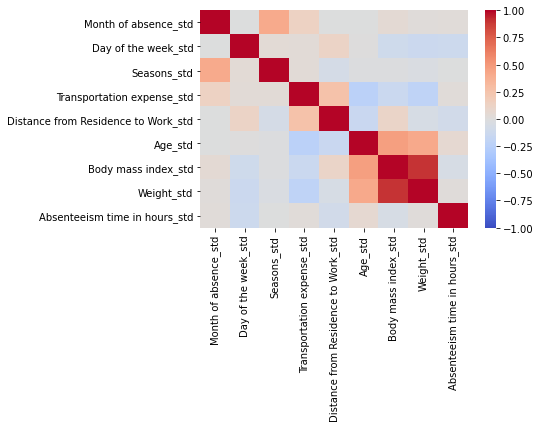

In [33]:
import seaborn as sns
sns.heatmap(X_data.corr(),vmin=-1,vmax=1,center=0,cmap='coolwarm')

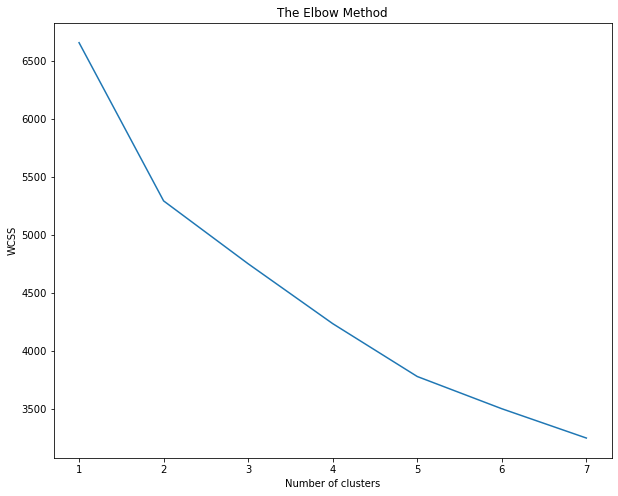

In [65]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
K-Means Clustering & Cluster Information

In [ ]:
# Fitting K-Means to the dataset

In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_data)
X['Cluster_label_3_clus'] = pd.DataFrame(y_kmeans)

In [70]:
X['Cluster_label_3_clus'].value_counts()

0    382
1    358
Name: Cluster_label_3_clus, dtype: int64

In [71]:
X.groupby('Cluster_label_3_clus').agg(['mean'])

Month of absence Day of the week   Seasons  \
                                 mean            mean      mean   
Cluster_label_3_clus                                              
0                            6.473822        4.068063  2.604712   
1                            6.164804        3.751397  2.480447   

                     Transportation expense Distance from Residence to Work  \
                                       mean                            mean   
Cluster_label_3_clus                                                          
0                                252.429319                       30.151832   
1                                188.145251                       29.075419   

                            Age Body mass index     Weight  \
                           mean            mean       mean   
Cluster_label_3_clus                                         
0                     33.722513       23.280105  68.340314   
1                     39.360335       30.301676  90.446927   

                     Absenteeism time in hours  
                                          mean  
Cluster_label_3_clus                            
0                                     7.028796  
1                                     6.812849

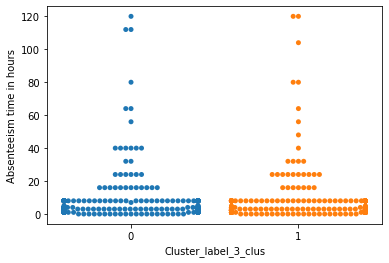

In [74]:
import seaborn as sns
ax=sns.swarmplot(x="Cluster_label_3_clus",y="Absenteeism time in hours",data=X)

In [75]:
from sklearn.metrics import silhouette_score
cluster_label=X['Cluster_label_3_clus']
silhouette_avg = silhouette_score(X, cluster_label)
silhouette_avg

0.19456476584207424

In [76]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,cluster_label)

1.5952087669633637

In [ ]:
Predicting Absenteeism time in hours

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import scale as s
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split as t
import sklearn.metrics as mt

In [36]:
x = df.drop(['ID','Absenteeism time in hours'],axis=1).values
y = df['Absenteeism time in hours'].values

In [37]:
x = s(x)
y = s(y)

In [ ]:
Train Test splitting is mandatory to find model's performance on testing dataset. Data is split in 80:20 ratio

In [38]:
train_x,test_x,train_y,test_y = t(x,y,test_size=0.2)

In [ ]:
Random Forest
choose 100 number of Trees/Estimators for our Random Forest Regressor with maximum depth of 4

In [39]:
rfr = RandomForestRegressor(n_estimators=100,max_depth=4)
rfr.fit(train_x,train_y)
print(f'Score = {rfr.score(test_x,test_y)}')
print(f'MSE = {mt.mean_squared_error(test_y,rfr.predict(test_x))}')

Score = 0.006781948696979789
MSE = 1.383250933098082


In [ ]:
Linear Regression

In [40]:
lr = LinearRegression()
lr.fit(train_x,train_y)
print(f'Score = {mt.r2_score(test_y,lr.predict(test_x))}')
print(f'MSE = {mt.mean_squared_error(test_y,lr.predict(test_x))}')

Score = 0.07782610951452462
MSE = 1.2843080054971243


In [ ]:
K-Nearest Neighbors

In [41]:
knr = KNeighborsRegressor(n_neighbors=10)
knr.fit(train_x,train_y)
print(f'Score = {mt.r2_score(test_y,knr.predict(test_x))}')
print(f'MSE = {mt.mean_squared_error(test_y,knr.predict(test_x))}')

Score = -0.0028985693559007153
MSE = 1.3967329530955563


In [ ]:
Multi-Layer Perceptron

In [42]:
mlpr = MLPRegressor(hidden_layer_sizes=(100,50,1), max_iter=500)
mlpr.fit(train_x,train_y)
print(f'Score = {mlpr.score(test_x,test_y)}')
print(f'MSE = {mt.mean_squared_error(test_y,mlpr.predict(test_x))}')

Score = -0.1587537815296045
MSE = 1.6137919034284092


In [ ]:
 This projects divided into 8 parts: 1.) Define and categorize problem statement 2.) Gather the data 3.) Prepare data for consumption 4.) Perform Exploratory Data Analysis 5.) Models Building 6.) Evaluate and compare Model performances and choose the best model 7.) Hypertune the selected model 8.) Produce sample output with tuned model

In [ ]:
 To analyze the cause of absenteeism

In [43]:
import os
import pandas as pd
import numpy as np
from scipy import stats

In [44]:
#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#----- for preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

#---- for model building
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#---- for cross validation
#from sklearn.cross_validation import train_test_split

#---- for visualization---
import matplotlib.pyplot as plt 
import seaborn as sn
#------ for model evaluation -----
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#---- For handling warnings
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [45]:
emp_abntsm=pd.read_csv(r'C:\Users\Admin\Desktop\Absentisam.csv')
emp_abntsm.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [94]:
# For ease of operations, lets change the names of the columns to short versions
#emp_abntsm.rename(columns=lambda x: x.replace(' ', '_'))
emp_abntsm=emp_abntsm.rename(columns = {'Reason for absence':'Absence_Reason','Month of absence':'Absence_Month','Day of the week':'Absence_Day','Transportation expense': 'Transportation_Expense','Distance from Residence to Work':'Work_Distance','Service time':'Service_Time','Work load Average/day ':'Average_Workload','Hit target': 'Hit_Target','Disciplinary failure':'Disciplinary_Failure','Social drinker':'Drinker','Social smoker':'Smoker','Body mass index':'BMI','Absenteeism time in hours':'Absent_Hours'})



In [95]:
emp_abntsm.head()

ID  Absence_Reason  Absence_Month  Absence_Day  Seasons  \
0  11              26              7            3        1   
1  36               0              7            3        1   
2   3              23              7            4        1   
3   7               7              7            5        1   
4  11              23              7            5        1   

   Transportation_Expense  Work_Distance  Service_Time  Age  Average_Workload  \
0                     289             36            13   33           239.554   
1                     118             13            18   50           239.554   
2                     179             51            18   38           239.554   
3                     279              5            14   39           239.554   
4                     289             36            13   33           239.554   

   ...  Disciplinary_Failure  Education  Son  Drinker  Smoker  Pet  Weight  \
0  ...                     0          1    2        1       0    1      90   
1  ...                     1          1    1        1       0    0      98   
2  ...                     0          1    0        1       0    0      89   
3  ...                     0          1    2        1       1    0      68   
4  ...                     0          1    2        1       0    1      90   

   Height  BMI  Absent_Hours  
0     172   30             4  
1     178   31             0  
2     170   31             2  
3     168   24             4  
4     172   30             2  

[5 rows x 21 columns]

In [ ]:
target feature is: 'Absenteeism time in hour' and other 20 columns, which are mix of continous and categorical(although defined as int/floats) features are predictors.

In [ ]:
Part 3 : Prepare the data for consumption(Data Cleaning)

In [ ]:
#### 3a.) Check the shape/properties of the data
#### 3b.) Completing -- Perform missing value analysis and impute missing values if necessary
#### 3c.) Correcting -- Check for any invalid data inputs , for outliers or for any out of place data
#### 3d.) Creating -- Feature extraction . Extract any new features from existing features if required
#### 3e.) Converting -- Converting data to proper formats

In [47]:
emp_abntsm.shape

(740, 21)

In [ ]:
CHEKING PROPERTIES OF DATA

In [48]:
emp_abntsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [ ]:
# ->There are null values in the dataset
# -> The datatypes are int and float

In [ ]:
#### ------------------3b.) Correcting -- Check for any invalid data inputs 
# From above observations data doesnot seem to have any invalid datatypes to be handled

# However feature 'Absence_Month' have an imvalid value 0. Lets drop it.
# ALso, as we can see, 'Absent_Hours' are 0 in some places.
# This could be result of cancelled or withdrwan leaves. Lets drop these

emp_abntsm = emp_abntsm[(emp_abntsm.Absent_Hours > 0)]
emp_abntsm = emp_abntsm[(pd.notnull(emp_abntsm.Absence_Month)) & ~(emp_abntsm.Absence_Month == 0)] 
# Let's check for the outliers in EDA step

In [ ]:
3c.) Completing -- Perform missing value analysis and impute missing values if necessary
#-- Calculating % of NULL
# what we can infer:
# ->There are  null values in almost all the columns of the dataset, although in small amount.
# -> We'll drop all the null value rows for target variable and 
# -> We'll will impute null values for all other features

In [87]:
(emp_abntsm.isna().sum() / emp_abntsm.shape[0])*100

ID                                 0.0
Reason for absence                 0.0
Month of absence                   0.0
Day of the week                    0.0
Seasons                            0.0
Transportation expense             0.0
Distance from Residence to Work    0.0
Service time                       0.0
Age                                0.0
Work load Average/day              0.0
Hit target                         0.0
Disciplinary failure               0.0
Education                          0.0
Son                                0.0
Social drinker                     0.0
Social smoker                      0.0
Pet                                0.0
Weight                             0.0
Height                             0.0
Body mass index                    0.0
Absenteeism time in hours          0.0
dtype: float64

In [96]:
final_col = ['Transportation_Expense','Work_Distance','Service_Time','Age','BMI','Drinker','Smoker','Height','Weight','Pet','Son','Education','Disciplinary_Failure','Hit_Target']

In [97]:
for i in emp_abntsm['ID'].unique(): 
    for j in final_col :
        emp_abntsm.loc[((emp_abntsm['ID'] == i) & (emp_abntsm[j].isna())), j] = emp_abntsm[(emp_abntsm.ID==i)][j].max()

In [98]:
emp_abntsm[['ID','Absence_Month','Average_Workload']].sort_values(['Absence_Month','ID','Average_Workload'])

ID  Absence_Month  Average_Workload
737   4              0           271.219
738   8              0           271.219
739  35              0           271.219
361   1              1           330.061
581   3              1           313.532
..   ..            ...               ...
99   34             12           261.306
104  34             12           261.306
110  34             12           261.306
343  36             12           236.629
100  36             12           261.306

[740 rows x 3 columns]

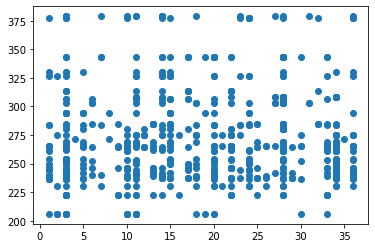

In [99]:
plt.scatter(x='ID', y='Average_Workload', s=None, c=None, marker=None, data=emp_abntsm)

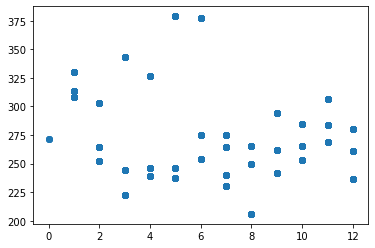

In [100]:
plt.scatter(x='Absence_Month', y='Average_Workload', s=None, c=None, marker=None, data=emp_abntsm)

In [ ]:
From above, we can deduce that 'Average_Workload' is distributed mostly by month.
#So, let's impute missing 'Average_Workload' by mode of that month

In [ ]:
update workload with the mode of corresponding month's workload

In [101]:
for i in emp_abntsm['Absence_Month'].unique(): 
    frequent_wrkld = stats.mode(emp_abntsm[emp_abntsm['Absence_Month']==i]['Average_Workload'])[0][0]
    emp_abntsm.loc[((emp_abntsm['Absence_Month']==i) & pd.isna(emp_abntsm['Average_Workload'])),'Average_Workload'] = frequent_wrkld

In [ ]:
Fill missing values of 'Absent_Hours' with 0

In [103]:
emp_abntsm.Absent_Hours = emp_abntsm.Absent_Hours.fillna(0)

In [ ]:
Converting -- Converting data to proper formats
# features like 'Absence_Month','Education' are categories here. Lets convert to categories

In [104]:
categorical_var = ['Absence_Reason','Absence_Month','Absence_Day','Seasons','Disciplinary_Failure','Education','Son','Drinker','Smoker','Pet']
continous_var = ['ID','Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI']
target_var = ['Absent_Hours']
for i in categorical_var:
    emp_abntsm[i] = emp_abntsm[i].astype("category")
emp_abntsm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      740 non-null    int64   
 1   Absence_Reason          740 non-null    category
 2   Absence_Month           740 non-null    category
 3   Absence_Day             740 non-null    category
 4   Seasons                 740 non-null    category
 5   Transportation_Expense  740 non-null    int64   
 6   Work_Distance           740 non-null    int64   
 7   Service_Time            740 non-null    int64   
 8   Age                     740 non-null    int64   
 9   Average_Workload        740 non-null    float64 
 10  Hit_Target              740 non-null    int64   
 11  Disciplinary_Failure    740 non-null    category
 12  Education               740 non-null    category
 13  Son                     740 non-null    category
 14  Drinker                 74

In [ ]:
Creating -- Feature extraction . Extract any new features from existing features if required

In [ ]:
Outlier Analysis

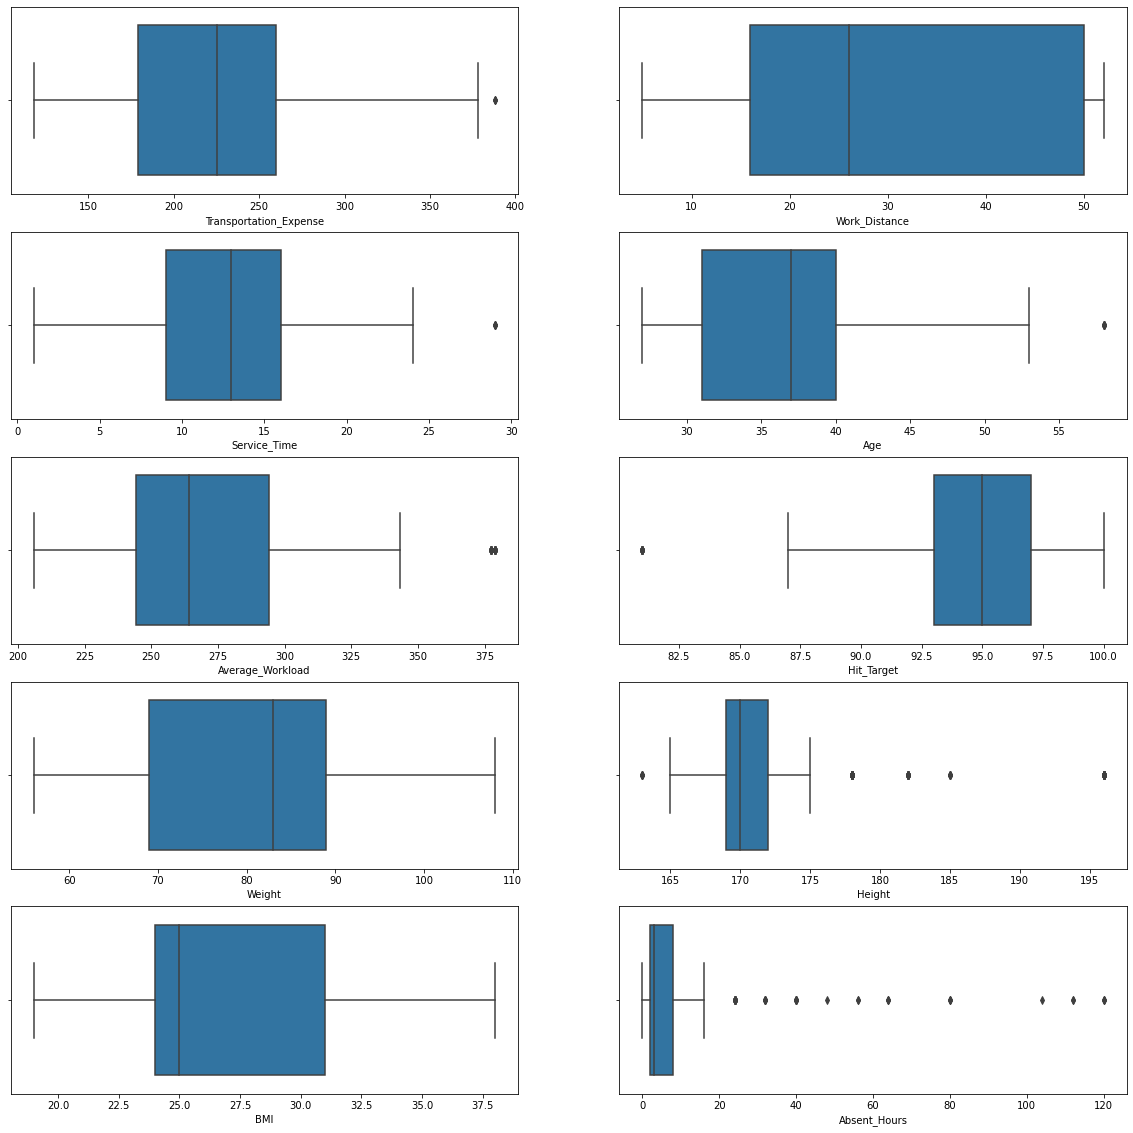

In [105]:
box = ['Transportation_Expense','Work_Distance','Service_Time','Age','Average_Workload','Hit_Target','Weight','Height','BMI','Absent_Hours']
row = 5
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=box[i], y=None, hue=None, data=emp_abntsm, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

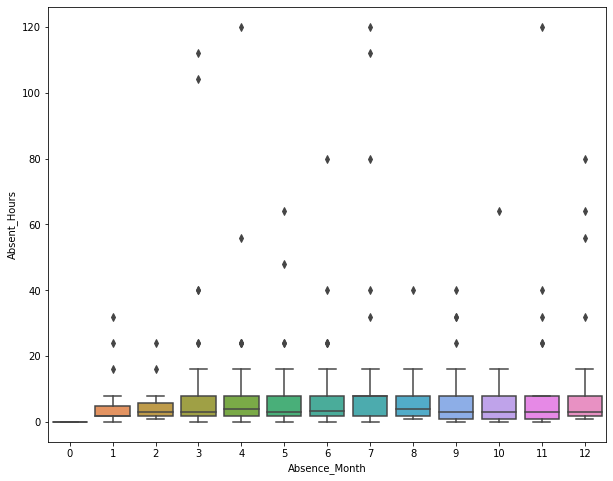

In [106]:
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,8)
sn.boxplot(x=emp_abntsm['Absence_Month'], y='Absent_Hours', hue=None, data=emp_abntsm, order=None, hue_order=None, orient=None, color=None, palette=None,ax=ax)

In [ ]:
Target feature 'Absent_hours', has many outliers. It needs to be handled( will handle it after exploratory analysis)
# -> Not many outliers in independent features. Data seems balanced.

In [ ]:
Explore continous features 
##Explore the correlation btwn the independent continous features with target variabe

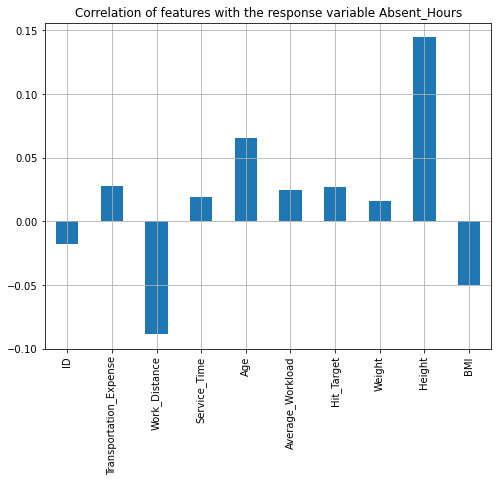

In [107]:
corr=emp_abntsm[continous_var].corrwith(emp_abntsm.Absent_Hours)
corr.plot.bar(figsize=(8,6), title='Correlation of features with the response variable Absent_Hours', grid=True, legend=False, style=None, fontsize=None, colormap=None, label=None)

In [ ]:
heatmap for correlation matrix---------##
##to check multicollinearity ---##


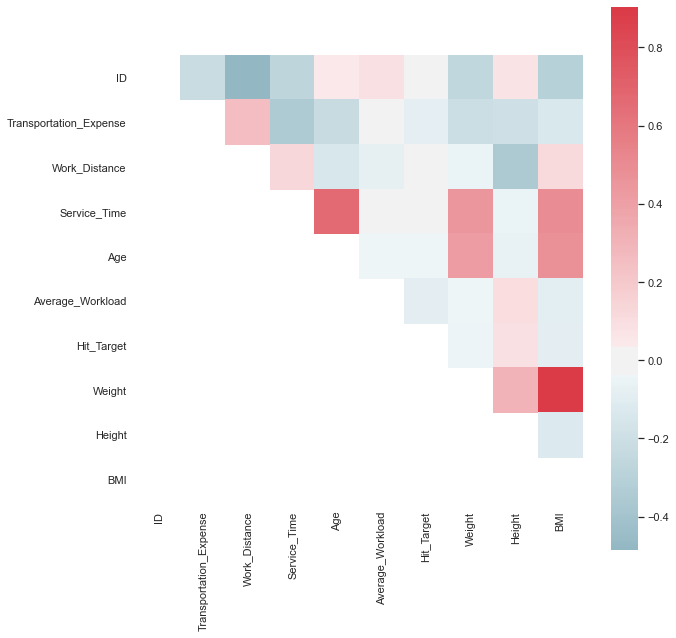

In [108]:
corr = emp_abntsm[continous_var].corr()
#correlation matrix
sn.set(style='white')
#compute correlation matrix
#corr =bike.drop(columns=['cnt']).corr()
#generate a mask for upper triangle#
mask =np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)]=True
#setuop the matplotlab figure
f,ax=plt.subplots(figsize=(10,10))
#generate a custom diverging colormap
cmap=sn.diverging_palette(220, 10, s=75, l=50, sep=10, n=6, center='light', as_cmap=True)
#heatmap
sn.heatmap(corr, vmin=None, vmax=None, cmap=cmap, center=0, robust=False, fmt='.2g', linewidths=0, linecolor='white', square=True, mask=mask, ax=None)
#correlation matrix

In [ ]:
This shows that there is multicollinearity in the dataset. BMI and Weight are highly correlated. 'Service_Time' and 'Age' are also correlated
#Will have to deal with multi collinearity by removing few features from the dataset.

In [ ]:
Lets explore some more, the relationship btwn independent continous variables and dependent variable using JOINT PLOTs
#graph individual numeric features by 'Absent_Hours

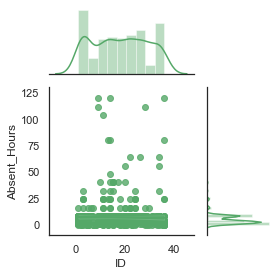

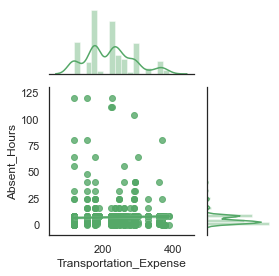

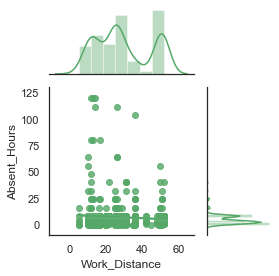

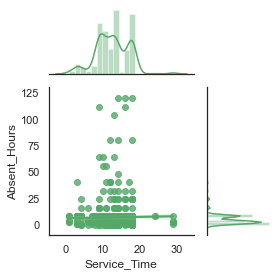

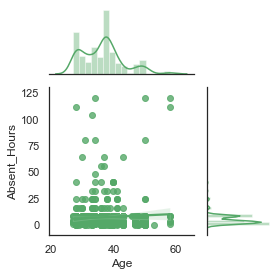

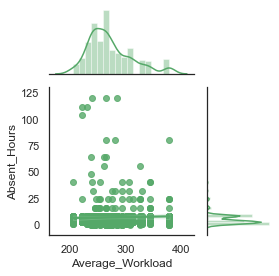

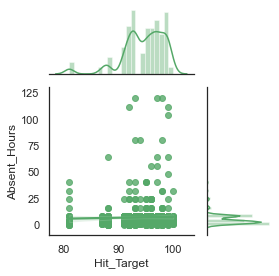

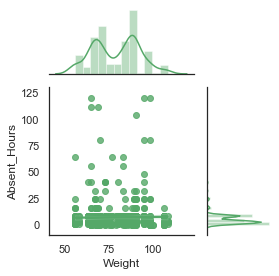

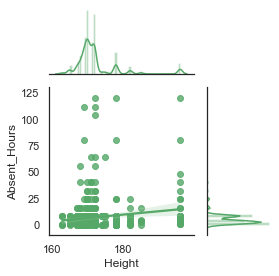

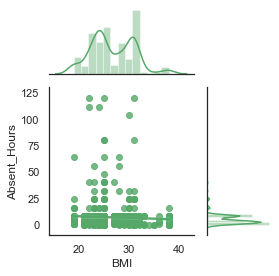

In [109]:
for i in continous_var:
    sn.jointplot(i, "Absent_Hours", data=emp_abntsm, kind='reg', color='g', size=4, ratio=2, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None)

In [ ]:
Checking the effect of 'Age' on 'Absence'
#--- Aggregate data by 'Age' and by total hours of absence

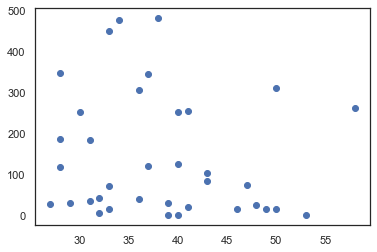

In [110]:
emp_hours = emp_abntsm[['ID','Absent_Hours']].groupby('ID').sum().reset_index()
emp_age = emp_abntsm[['ID','Age']].groupby('ID').max().reset_index()
absence_by_age = emp_hours.merge(emp_age, how='inner',left_on='ID', right_on='ID')

plt.scatter('Age', 'Absent_Hours', data=absence_by_age)

In [ ]:
people over 40+ years of age tends to take less leaves compare to others

In [ ]:
Checking the effect of 'Transportation_Expense' on 'Absence'
Aggregate data by 'Transportation_Expense' and by total hours of absence

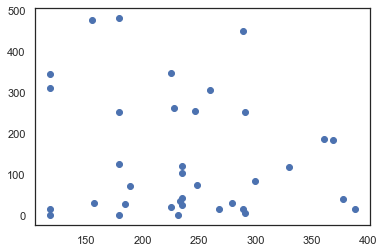

In [111]:
emp_transport = emp_abntsm[['ID','Transportation_Expense']].groupby('ID').max().reset_index()
absence_by_transport = emp_hours.merge(emp_transport, how='inner',left_on='ID', right_on='ID')

plt.scatter('Transportation_Expense', 'Absent_Hours', data=absence_by_transport)

In [ ]:
This clearly shows concentration of leaves more where the Transportation_Expense is between 150-300

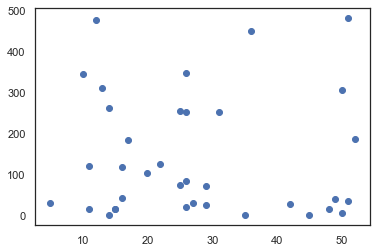

In [112]:
emp_distance = emp_abntsm[['ID','Work_Distance']].groupby('ID').max().reset_index()
absence_by_distance = emp_hours.merge(emp_distance, how='inner',left_on='ID', right_on='ID')

plt.scatter('Work_Distance', 'Absent_Hours', data=absence_by_distance)

In [ ]:
This clearly shows concentration of leaves more where the distance from work is between 10-30 km

In [ ]:
Checking the effect of 'Service_Time' on 'Absence'
#--- Aggregate data by 'Service_Time' and by total hours of absence

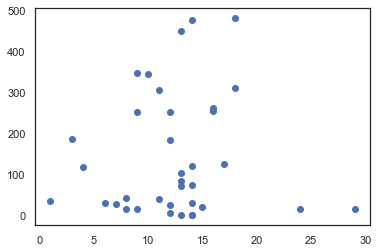

In [113]:
emp_service = emp_abntsm[['ID','Service_Time']].groupby('ID').max().reset_index()
absence_by_service = emp_hours.merge(emp_service, how='inner',left_on='ID', right_on='ID')

plt.scatter('Service_Time', 'Absent_Hours', data=absence_by_service)

In [ ]:
Evident from above, employees with service years < 8 and >18 tends to take less leaves

In [ ]:
Checking the distribution of target feature

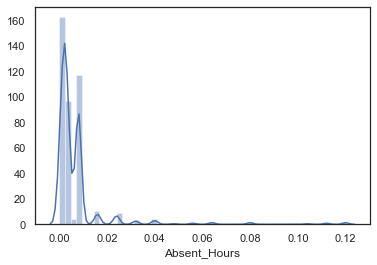

In [114]:
sn.distplot(emp_abntsm['Absent_Hours']/1000, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

In [ ]:
 Target variable 'Absent_Hours' is not normally distributed, which is not a good thing. 
# -> We have to look in to this, before feeding the data to model.

# -> 'Work_Distance','Age','Average_Workload' has good correlation with target feature 'Absent_Hours'.
# -> Let's drop others from further analysis.

# -> There is multi collinearity in dataset. 'Work_Distance' and 'Transportation_Expense' are correlated. 
# -> However, since p(Transportation_Expense) > p(Work_Distance), we'll drop Transportation_Expense from further analysis.

In [ ]:
Now let's analyze the absence by total hours of absence (not by frequency)

In [ ]:
Checking for the reason of Absence(checking the top reasons for absence as per the total numbers of absence)

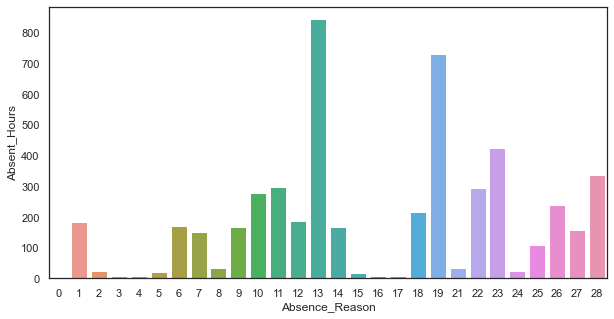

In [115]:
emp_reason_tot_hours = emp_abntsm[['Absence_Reason','Absent_Hours']].groupby('Absence_Reason').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,5)
sn.barplot(x='Absence_Reason', y='Absent_Hours', hue=None, data=emp_reason_tot_hours, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax)

In [ ]:
Longest hours of absences for reason 13,19,23,28(to reduce need In long term, introducing exercise/yoga sessions in office once/twice a week will help reduce physiotherapy issues¶)

In [ ]:
Analyzing absence dependency of no of kids

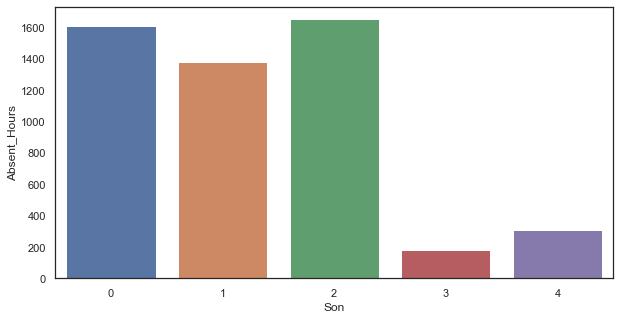

In [116]:
emp_son_tot = emp_abntsm[['Son','Absent_Hours']].groupby('Son').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(10,5)
sn.barplot(x='Son', y='Absent_Hours', hue=None, data=emp_son_tot, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax)

In [ ]:
Employees with 3-4 kids tend to take less hours of absence

In [ ]:
Analyzing absence dependency of month of year

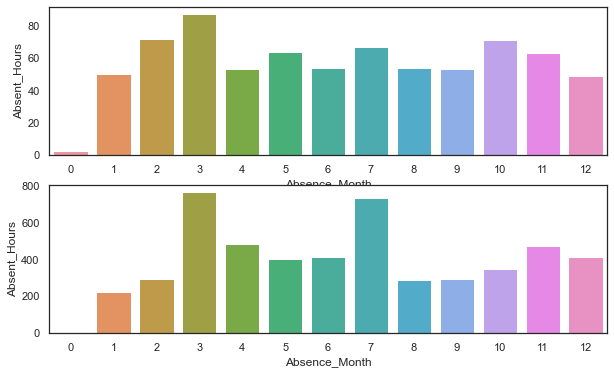

In [117]:
emp_month_frequent = emp_abntsm[['Absence_Month','Absent_Hours']].groupby('Absence_Month').count().sort_values('Absent_Hours').reset_index()

#--Leaves by total hours
emp_month_tot = emp_abntsm[['Absence_Month','Absent_Hours']].groupby('Absence_Month').sum().sort_values('Absent_Hours').reset_index()
fig,ax = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,6)
sn.barplot(x='Absence_Month', y='Absent_Hours', hue=None, data=emp_month_frequent, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax[0])
sn.barplot(x='Absence_Month', y='Absent_Hours', hue=None, data=emp_month_tot, order=None, hue_order=None, units=None, orient=None, color=None, palette=None,errcolor='.26', ax=ax[1])

In [ ]:
March tops the month for most absences. This makes sense as this is peak holiday season due to change of weather and clear and sunny sky
Second one is July, which again is the 'holiday' season

In [ ]:
Prepare data for modelling

In [ ]:
Drop the features which are not very relevant based on above analyses

In [118]:
emp_df  = emp_abntsm[['ID','Absence_Month','Son','Drinker','Work_Distance','Service_Time','Age','Average_Workload','Absent_Hours']]

In [ ]:
since we need to predict the losses per month, Lets aggregate the data on month(and ID, since the features category is different for each ID) before feeding the data to model.

In [ ]:
Lets aggregate the data on 'Month' and 'Id'

In [119]:
emp_num = emp_df[['ID','Absence_Month','Work_Distance','Service_Time','Age','Average_Workload']].groupby(['ID','Absence_Month']).max().reset_index()
emp_tgt = emp_df[['ID','Absence_Month','Absent_Hours']].groupby(['ID','Absence_Month']).sum().reset_index()
emp_cat = emp_abntsm[['ID','Absence_Month','Son','Drinker']].groupby(['ID','Absence_Month']).max().reset_index()
emp = emp_num.merge(emp_cat, how='inner',left_on=['ID','Absence_Month'], right_on=['ID','Absence_Month']).merge(emp_tgt, how='inner',left_on=['ID','Absence_Month'], right_on=['ID','Absence_Month'])
emp.head()

ID Absence_Month  Work_Distance  Service_Time   Age  Average_Workload  Son  \
0   1             0            NaN           NaN   NaN               NaN  NaN   
1   1             1           11.0          14.0  37.0           330.061  1.0   
2   1             2            NaN           NaN   NaN               NaN  NaN   
3   1             3           11.0          14.0  37.0           244.387  1.0   
4   1             4           11.0          14.0  37.0           326.452  1.0   

   Drinker  Absent_Hours  
0      NaN           NaN  
1      0.0           1.0  
2      NaN           NaN  
3      0.0          16.0  
4      0.0          11.0

In [ ]:
Deal with Nans introduced(same way already done above, by imputing)


In [121]:
final_col = ['Work_Distance','Service_Time','Age','Drinker','Son']

Missing value Impute with Nan

In [122]:
for i in emp['ID'].unique(): 
    for j in final_col :
        emp.loc[((emp['ID'] == i) & (emp[j].isna())), j] = emp[(emp.ID==i)][j].max()

In [123]:
for i in emp['Absence_Month'].unique(): 
    frequent_wrkld = stats.mode(emp[emp['Absence_Month']==i]['Average_Workload'])[0][0]
    emp.loc[((emp['Absence_Month']==i) & pd.isna(emp['Average_Workload'])),'Average_Workload'] = frequent_wrkld

In [ ]:
update NA 'Absent_Hours' with 0

In [124]:
emp.Absent_Hours = emp.Absent_Hours.fillna(0)

In [125]:
emp.head()

ID Absence_Month  Work_Distance  Service_Time   Age  Average_Workload  Son  \
0   1             0           11.0          14.0  37.0           271.219  1.0   
1   1             1           11.0          14.0  37.0           330.061  1.0   
2   1             2           11.0          14.0  37.0           302.585  1.0   
3   1             3           11.0          14.0  37.0           244.387  1.0   
4   1             4           11.0          14.0  37.0           326.452  1.0   

   Drinker  Absent_Hours  
0      0.0           0.0  
1      0.0           1.0  
2      0.0           0.0  
3      0.0          16.0  
4      0.0          11.0

In [ ]:
Lets check for any outliers in the aggregated data

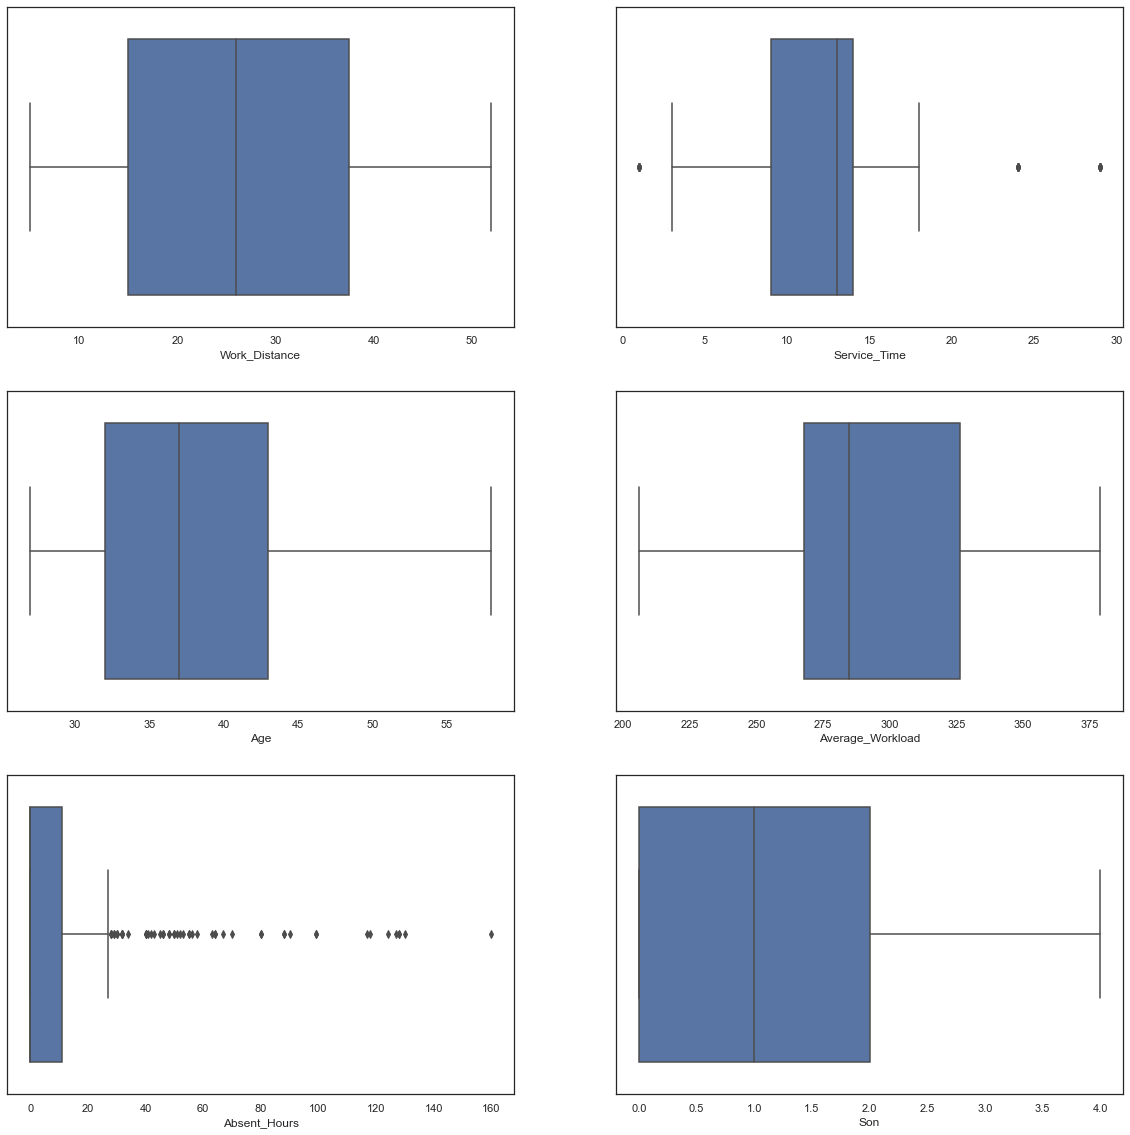

In [126]:
continous_var = ['Work_Distance','Service_Time','Age','Average_Workload','Absent_Hours','Son']
row = 3
col = 2
r = 0
c=0
i=0
fig,ax = plt.subplots(nrows=row,ncols=col)
fig.set_size_inches(20,20)

while r < row:
    c =0
    while c < col:
        sn.boxplot(x=continous_var[i], y=None, hue=None, data=emp, order=None, orient=None, ax=ax[r,c])
        c=c+1
        i=i+1
    r=r+1

In [ ]:
'Absent_Hours' has so many outliers, this will affect model. So, extreme outliers needs to be removed to make the model more generic.
# We are not removing outliers in service time, since the input data for 2011 is going to be same as 2010(except 'Age' and 'ServiceTime')

In [ ]:
Create a function to remove outliers from any column, from any database

In [127]:
def remove_outlier(df_in, col_name):
    q1 = np.percentile(df_in[col_name],25)
    q3 = np.percentile(df_in[col_name],75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
remove out liers

In [128]:
continous_var = ['Service_Time','Age','Absent_Hours']
for i in continous_var:
    emp = remove_outlier(emp,i)

In [ ]:
Check the distribution of target feature

In [ ]:
It seems better distributed then previous

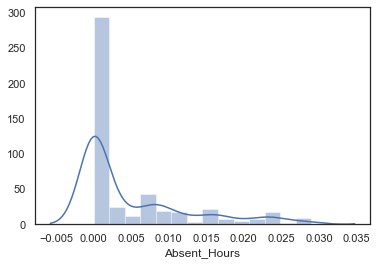

In [129]:
sn.distplot(emp['Absent_Hours']/1000, bins=None, hist=True, kde=True)

In [ ]:
Lets standardise the range/scale for better performance of model
#--We can use scikit-learn preprocessing library functions StandardScaler/Normalizer for the same.

In [130]:
def Standardize_Values(df):
    df_new = df
    var = ['Work_Distance','Service_Time','Age','Average_Workload']
    for i in var:
        df_new[i] = (np.max(df_new[i]) - df_new[i]) / (np.max(df_new[i]) - np.min(df_new[i]))
    return df_new

In [ ]:
Standardize the values

In [131]:
emp_final = Standardize_Values(emp)
emp_final.head()

ID Absence_Month  Work_Distance  Service_Time       Age  Average_Workload  \
0   1             0        0.87234      0.266667  0.615385          0.622460   
1   1             1        0.87234      0.266667  0.615385          0.282268   
2   1             2        0.87234      0.266667  0.615385          0.441119   
3   1             3        0.87234      0.266667  0.615385          0.777588   
4   1             4        0.87234      0.266667  0.615385          0.303133   

   Son  Drinker  Absent_Hours  
0  1.0      0.0           0.0  
1  1.0      0.0           1.0  
2  1.0      0.0           0.0  
3  1.0      0.0          16.0  
4  1.0      0.0          11.0

In [ ]:
Model Building

In [ ]:
selecting 3 models to test and evaluate
 #   -> Linear Regression Model
 #   -> Random Forest (ensemble method using bagging technique)
 #   -> Gradient Boosting (ensemble method using boosting technique)
#2.) Cross validation    
#3.) All these 3 models will be compared and evaluated
#4.) We'll choose the best out of 3

In [ ]:
key hyper tuning parameters-R-squared value,RootMeanSquared,MeanAbsoluteError

In [132]:
def model_eval_matrix(model,X_test,Y_test,Y_predict):
    r_squared = model.score(X_test, Y_test)
    mse = mean_squared_error(Y_predict, Y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_predict, Y_test)
    return r_squared,mse,rmse, mae

In [133]:
#train,test = train_test_split(emp_final, test_size=0.20, random_state=1)
train = emp_final[:80]
test = emp_final[20:]
X_train = train.drop(columns = ['Absent_Hours','ID'])
#Y_train = np.log(train.Absent_Hours)
Y_train = train.Absent_Hours/1000
X_test = test.drop(columns = ['Absent_Hours','ID'])
#Y_test = np.log(test.Absent_Hours)
Y_test = test.Absent_Hours/1000

In [ ]:
Define Linear regession model

In [134]:
lrm_regressor = LinearRegression()
lrm_regressor.fit(X_train, Y_train)
Y_predict_lrm =lrm_regressor.predict(X_test)

In [ ]:
Random Forest Model (Ensemble method using Bagging technique)

In [135]:
forest_reg = RandomForestRegressor(n_estimators=2000, criterion='mse', max_depth=10, min_samples_split=5, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=20, min_impurity_decrease=0.00, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=1, verbose=0, warm_start=False)
forest_reg.fit(X_train, Y_train)
Y_predict_forest =forest_reg.predict(X_test)

In [ ]:
Building XGBoost Model (Ensemble method using Boosting technique)

In [136]:
#xgb_reg = GradientBoostingRegressor(random_state=1) # without parameter hypertuning
# Following model is with parameter hypertuning
xgb_reg = GradientBoostingRegressor(loss='ls', learning_rate=0.2, n_estimators=2000, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=1, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=15, warm_start=False, presort='auto')
xgb_reg.fit(X_train, Y_train)
Y_predict_xgb = xgb_reg.predict(X_test)

In [ ]:
Stroring all model performances in dataframe to compare

In [137]:
metric=[]
ml_models=['Linear Reg','Random Forest','GradientBoost']
fitted_models= [lrm_regressor,forest_reg,xgb_reg]
Y_Predict =[Y_predict_lrm,Y_predict_forest,Y_predict_xgb]
i=0
for mod in ml_models:
    R_SQR,MSE,RMSE,MAE = model_eval_matrix(fitted_models[i],X_test,Y_test,Y_Predict[i])
    metric.append([mod,R_SQR,MSE,RMSE,MAE])
    i=i+1
df_mod_performance=pd.DataFrame(metric,columns =['Model','R-Squared','MeanSquaredError','RootMeanSquaredError','MeanAbsoluteError'])
df_mod_performance[['Model','RootMeanSquaredError']]

Model  RootMeanSquaredError
0     Linear Reg              0.013196
1  Random Forest              0.007614
2  GradientBoost              0.008651

In [ ]:
Random Forest proves to be best model here

In [ ]:
FINAL MODEL:: RANDOM FOREST

In [138]:
absence_prediction=X_test
absence_prediction['Absent_Hours'] = 1000*Y_test
absence_prediction['Predicted_Absent_Hours'] = 1000*Y_predict_forest
#final_bike_prediction_df['Predicted_Absent_Hours'] = round(final_bike_prediction_df['Predicted_Absent_Hours'])
#--- Sample output(with actual counts and predicted counts) ---
absence_prediction

Absence_Month  Work_Distance  Service_Time       Age  Average_Workload  \
20              7       0.489362           0.4  0.192308          0.859089   
21              8       0.489362           0.4  0.192308          1.000000   
22              9       0.489362           0.4  0.192308          0.489498   
23             10       0.489362           0.4  0.192308          0.543635   
24             11       0.489362           0.4  0.192308          0.419381   
..            ...            ...           ...       ...               ...   
463             8       0.829787           0.0  0.115385          0.654859   
464             9       0.829787           0.0  0.115385          0.489498   
465            10       0.829787           0.0  0.115385          0.658316   
466            11       0.829787           0.0  0.115385          0.419381   
467            12       0.829787           0.0  0.115385          0.679771   

     Son  Drinker  Absent_Hours  Predicted_Absent_Hours  
20   1.0      0.0           1.0                9.630558  
21   1.0      0.0          24.0               16.679684  
22   1.0      0.0           0.0                1.584601  
23   1.0      0.0           0.0                1.017386  
24   1.0      0.0           0.0                1.509662  
..   ...      ...           ...                     ...  
463  1.0      1.0           4.0                7.932052  
464  1.0      1.0           1.0                7.689748  
465  1.0      1.0           3.0                8.585211  
466  1.0      1.0           0.0                7.872290  
467  1.0      1.0           3.0               12.885839  

[350 rows x 9 columns]

In [ ]:
PREDICTED ABSENCE HOURS

In [139]:
absence_prediction.Predicted_Absent_Hours.sum()

2636.771904380338

In [ ]:
ACTUAL ABSENCE HOURS

In [140]:
absence_prediction.Absent_Hours.sum()

1723.0

In [ ]:
Predicted absence hours per month 

In [141]:
absence_prediction.groupby('Absence_Month').sum().reset_index()[['Absence_Month','Absent_Hours','Predicted_Absent_Hours']]

Absence_Month  Absent_Hours  Predicted_Absent_Hours
0              0           0.0              101.978191
1              1         106.0              119.865000
2              2         127.0              224.389893
3              3         147.0              202.309590
4              4         175.0              194.890953
5              5         217.0              259.924026
6              6          90.0              178.301322
7              7         122.0              199.933375
8              8         161.0              269.131932
9              9         109.0              249.979665
10            10         148.0              194.909435
11            11         183.0              204.020198
12            12         138.0              237.138322

In [ ]:
Since, random forest model is our final model to be used for prediction, We'll use this model to predict the losses

In [ ]:
Hereby, concluding the project with above predictions 